Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading dataset

In [ ]:
data = pd.read_csv("heart.csv")
print("Dataset loaded successfully!")
data.head()

Dataset loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking for null values and dataset info

In [ ]:
print("\nDataset Info:\n")
print(data.info())
print("\nMissing values in each column:\n", data.isnull().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca         

Exploratory Data Analysis (EDA)

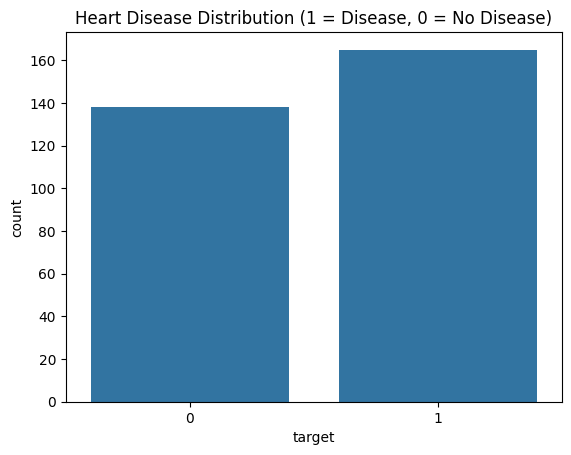

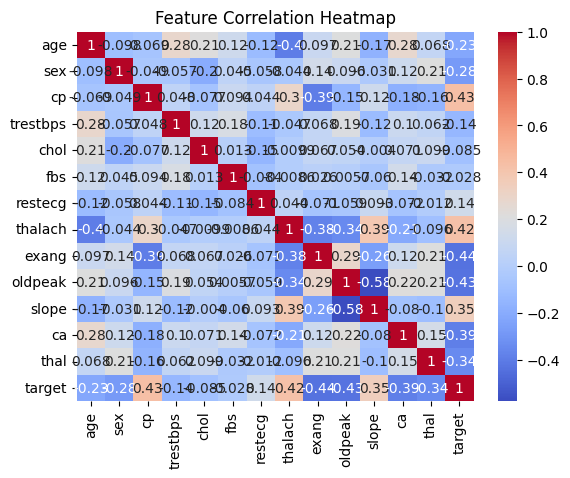

In [ ]:
sns.countplot(x='target', data=data)
plt.title("Heart Disease Distribution (1 = Disease, 0 = No Disease)")
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Feature selection and splitting

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

Spliting dataset into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing split successful!")

Training and testing split successful!


Standardize features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training models

In [ ]:
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predictions

In [ ]:
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

Evaluate models

In [ ]:
print("📊 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print("\n🌲 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

📊 Logistic Regression Results:
Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


🌲 Random Forest Results:
Accuracy: 0.8360655737704918
Confusion Matrix:
 [[24  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Comparing model performance

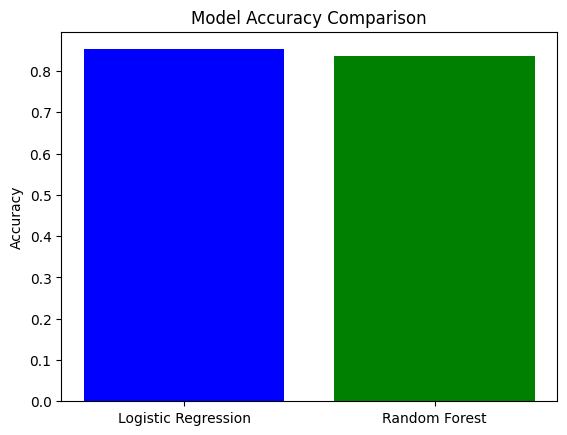

In [ ]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

Saving the best model

In [ ]:
import joblib
joblib.dump(rf_clf, 'heart_disease_model.pkl')
print("✅ Model saved successfully as 'heart_disease_model.pkl'")

✅ Model saved successfully as 'heart_disease_model.pkl'
